# **3. Струјање у пољу извора и понора једнаких издашности. Двопол.**

Разматра се струјање у пољу извора и понора једнаких издашности $\varepsilon$ који се налазе на одређеном растојању. Ради једноставности манипулације над математичким изразима, најпогодније је изабрати да су ова два сингуларитета смештена симетричном у односу на $y$-осу, и да се налазе на $x$-оси, у тачкама $z_{0,1} = -a$ (извор), односно $z_{0,2} = а$ (понор). Тако су комплексни потенцијал и комплексна брзина овог струјања

$$\qquad \qquad w(z) = \frac{\varepsilon}{2\pi} \, \ln(z+a) - \frac{\varepsilon}{2\pi} \,\ln(z-a), \qquad \overline{U}(z) \equiv \frac{\mathrm{d}w}{\mathrm{d}z} = \frac{\varepsilon}{2\pi(z+a)} - \frac{\varepsilon}{2\pi(z-a)}$$

У програмском коду који следи морамо да задамо издашност $\varepsilon$ као и растојање $a$. Изабраћемо да је $\varepsilon = 2 \,\mathrm{m^2/s}$, a растојање $a=1\,\mathrm{m}$.

Text(0, 0.5, '$y$')

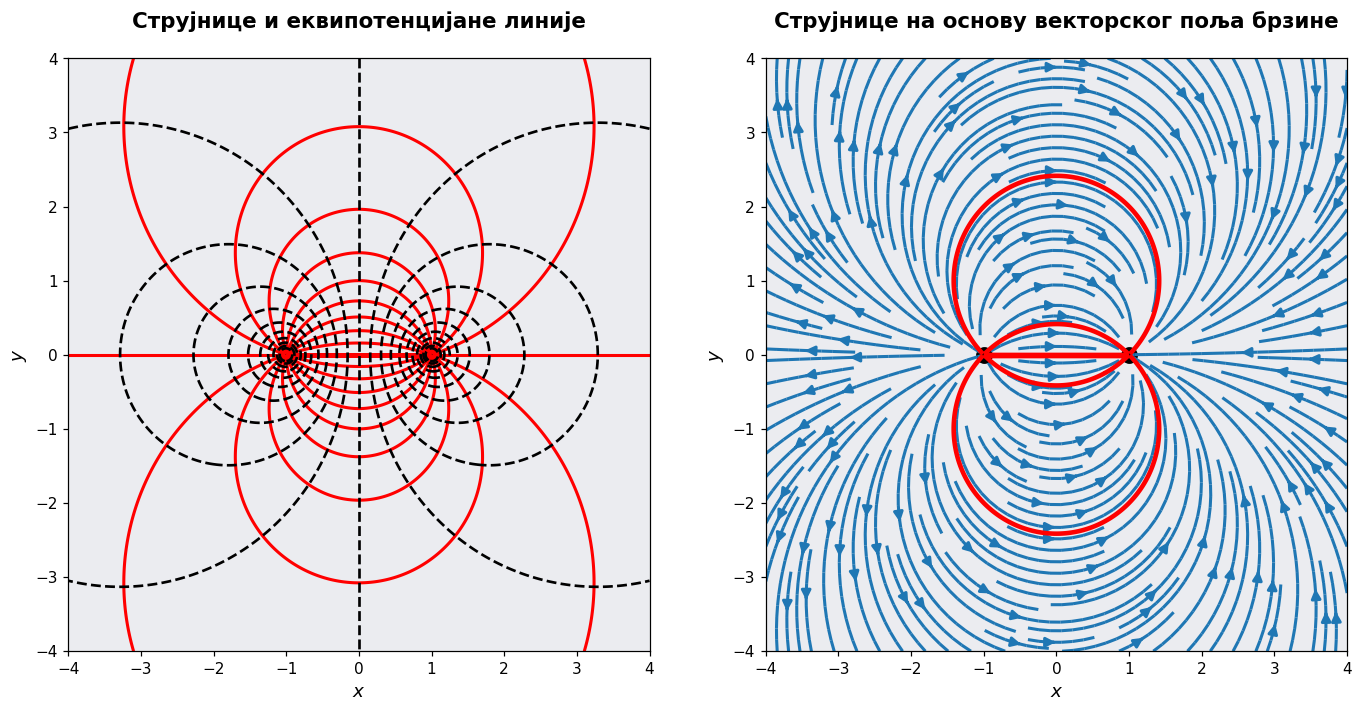

In [68]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#EBECF0' # светло сива позадина дијаграма

## Сингуларне тачке су тачке у којима се налазе извор и понор.
## Ако желимо да нам се не исписују упозорења о томе!
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


Nx = 401
Ny = 401
x = np.linspace(-4, 4, Nx)
y = np.linspace(-4, 4, Ny)
X,Y = np.meshgrid(x,y)

Eps = 2
a = 1

z = X + 1j*Y
Wz = Eps/(2*np.pi) * np.log(z + a) - Eps/(2*np.pi) * np.log(z - a)
phi = Wz.real
psi = Wz.imag

#psi = Eps/(2*np.pi)*(np.arctan2(Y, X+a) - np.arctan2(Y, X-a))

psi_i = np.linspace(-Eps/2, Eps/2, 21)
phi_i = np.linspace(-Eps/2, Eps/2, 21)


Uz = Eps/(2*np.pi*(z + a)) - Eps/(2*np.pi*(z - a))
u = Uz.real
v = -Uz.imag


plt.figure(figsize=(15, 7), dpi=110)
plt.subplots_adjust(hspace=1)

# Први дијаграм - струјнице и еквипотенцијалне линије
fig1 = plt.subplot(1,2,1)
plt.title("Струјнице и еквипотенцијане линије", fontsize=14, pad = 20, weight='bold')
strunice = fig1.contour(X,Y, psi, levels = psi_i, linewidths=2, colors='red', linestyles='solid')
ekvipotencijalne_linije = plt.contour(X,Y, phi, levels = phi_i, linewidths=1.75, linestyles='dashed', colors='black')
fig1.scatter(-a,0, color='black', s = 100, marker='o', zorder=1)
fig1.scatter(a,0, color='black', s = 100, marker='o', zorder=1)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

fig2 = plt.subplot(1,2,2)
plt.title("Струјнице на основу векторског поља брзине", fontsize=14, pad = 20, weight='bold')
fig2.streamplot(X, Y, u, v, density=[1.75], linewidth=2, arrowsize = 1.25)
fig2.contour(X,Y, psi, levels=[-0.375*Eps, -0.125*Eps, 0.125*Eps, 0.375*Eps], colors='red', linewidths=3, linestyles='solid')
fig2.scatter(-a,0, color='black', s = 100, marker='o', zorder=1)
fig2.scatter(a,0, color='black', s = 100, marker='o', zorder=1)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

Интересантно је приказати расподелу брзине дуж $y$-oсе. Како на $у$-оси постоји само хоризонтална компонента брзине, ту зависност ћемо приказати на следећи начин. Kaко смо дефинисали непаран број тачака (401) у опсегу од \[-4,4\], двестота тачка ће означавати $y$-осу. 

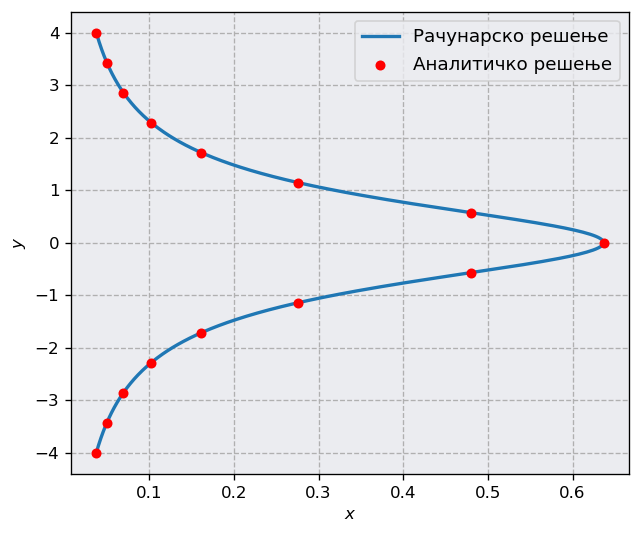

In [73]:
plt.figure(figsize=(6,5), dpi=120)
plt.grid(True, linestyle='dashed')
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)

plt.plot(u[:, int((Nx-1)/2)], y, lw=2, label='Рачунарско решење')
plt.legend(fontsize=9)

## Расподела на основу аналитичке функције изведене на предавањима
y_an = np.linspace(-4,4,15)
u_an = Eps*a/(np.pi*(a**2 + y_an**2))
plt.scatter(u_an, y_an, color='red', zorder=2, s=25, label='Аналитичко решење')
plt.legend(fontsize=11)


## **3.1 Двопол**

Двопол спада у категорију основних струјања чије је порекло у претходно разматраном сложеном струјању (струјање у пољу извора и понора једнаких издашности $\varepsilon$ који се налазе на растојању $2a$. Двопол настаје у случају када у истовремено и $a\to 0$ и $\varepsilon \to \infty$ - извор и понор иду ка координантом почетку. Тада се комплексни потенцијал своди на 

$$ w(z) = \frac{M}{2\pi z}, \qquad M = \lim_{\begin{array}{c}a\to 0  \\\varepsilon \to \infty\end{array}} 2 a \varepsilon \,\, \text{ - коначна вредност, већа од нуле}$$

где је са $M$ означена величина која се назива **момент двопола**. Овде се ради о двополу смештеном у координатном почетку.

Text(0, 0.5, '$y$')

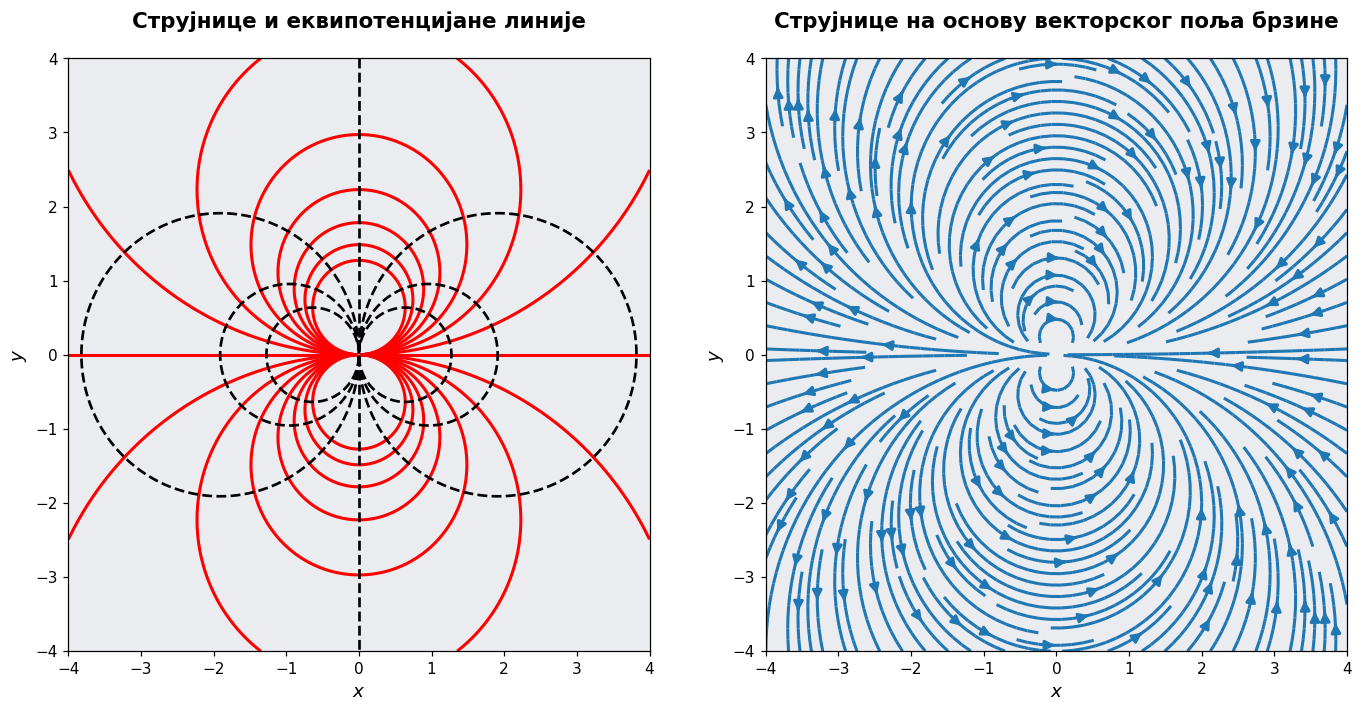

In [75]:
M = 2
w = M/(2*np.pi*z)

phi = w.real
psi = w.imag
psi_i = np.linspace(-M/8, M/8, 15)
phi_i = np.linspace(-M/8, M/8, 7)

U = - M/(2*np.pi*z**2)
u = U.real
v = -U.imag

plt.figure(figsize=(15, 7), dpi=110)
plt.subplots_adjust(hspace=1)

# Први дијаграм - струјнице и еквипотенцијалне линије
fig1 = plt.subplot(1,2,1)
plt.title("Струјнице и еквипотенцијане линије", fontsize=14, pad = 20, weight='bold')
strujnice = fig1.contour(X,Y, psi, levels = psi_i, linewidths=2, colors='red', linestyles='solid')
ekvipotencijalne_linije = plt.contour(X,Y, phi, levels = phi_i, linewidths=1.75, linestyles='dashed', colors='black')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

fig2 = plt.subplot(1,2,2)
plt.title("Струјнице на основу векторског поља брзине", fontsize=14, pad = 20, weight='bold')
fig2.streamplot(X, Y, u, v, density=[1.75], linewidth=2, arrowsize = 1.25)
#fig2.contour(X,Y, psi, levels=[0], colors='red', linewidths=3, linestyles='solid')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

Расподела брзине дуж $y$-осе се приказује на исти начин.

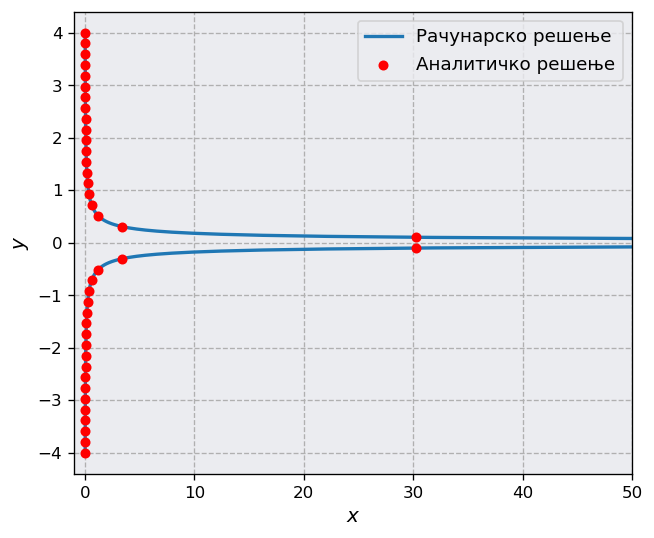

In [76]:
plt.figure(figsize=(6,5), dpi=120)
plt.grid(True, linestyle='dashed')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.plot(u[:, int((Nx-1)/2)], y, lw=2, label='Рачунарско решење')
plt.legend(fontsize=11)
plt.xlim(-1, 50)
#plt.ylim(-0.25,0.25)

## Расподела на основу аналитичке функције изведене на предавањима
y_an = np.linspace(-4,4,40)
u_an = M/(2*np.pi*y_an**2)
plt.scatter(u_an, y_an, color='red', zorder=2, s=25, label='Аналитичко решење')
plt.legend(fontsize=11)